In [ ]:
# import dependencies
import re
import pandas as pd
import numpy as np
from pathlib import Path
from math import *

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from google.colab import drive
%matplotlib inline

import firebase_admin
from firebase_admin import credentials, firestore

cred = credentials.Certificate("/content/drive/MyDrive/project_firebase_key/project-492-7210c-firebase-adminsdk-hm6kq-a2fa184d26.json")
firebase_admin.initialize_app(cred)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/project_firebase_key/project-492-7210c-firebase-adminsdk-hm6kq-a2fa184d26.json'

In [ ]:
# import dataset
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Influx/Influx_2022_01.csv")
# df = pd.read_csv("Influx_2023_05.csv")
df.head(5)

,datetime,time,bus,driver,getoff,geton,humid,lat,lng,passenger,pressure,route,speed,temp1,temp2,v,File Paths
0,1/5/2022 2:56:44 AM,1641351404000000000,74,9,NaN,0,NaN,18.768408,98.936906,0,NaN,99,0.302055,NaN,NaN,1.79.van,bus_raw_05.csv
1,1/5/2022 2:56:45 AM,1641351405000000000,74,9,NaN,0,NaN,18.768392,98.936912,0,NaN,99,0.111732,NaN,NaN,1.79.van,bus_raw_05.csv
2,1/5/2022 2:56:46 AM,1641351406000000000,74,9,NaN,0,NaN,18.768392,98.936912,0,NaN,99,0.111732,NaN,NaN,1.79.van,bus_raw_05.csv
3,1/5/2022 2:56:47 AM,1641351407000000000,74,9,NaN,0,NaN,18.768392,98.936912,0,NaN,99,0.111732,NaN,NaN,1.79.van,bus_raw_05.csv
4,1/5/2022 2:56:48 AM,1641351408000000000,74,9,NaN,0,NaN,18.768392,98.936912,0,NaN,99,0.111732,NaN,NaN,1.79.van,bus_raw_05.csv


In [ ]:
# Dropping columns
columns_to_drop = ['driver', 'getoff', 'geton', 'humid', 'passenger', 'pressure', 'route', 'temp1', 'temp2', 'v', 'File Paths']
df_cleaned = df.drop(columns=columns_to_drop)

In [ ]:
# Converting 'datetime' column to datetime type
df_cleaned['datetime'] = pd.to_datetime(df_cleaned['time'])

In [ ]:
# Filtering data for time between 8 am to 10 pm
df_filtered = df_cleaned[(df_cleaned['datetime'].dt.hour >=8) & (df_cleaned['datetime'].dt.hour <= 22)]
df_sorted = df_filtered.sort_values(by=['bus', 'datetime'])
df_sorted

,datetime,time,bus,lat,lng,speed
16728751,2022-01-28 10:10:44,1643364644000000000,1,18.805082,98.949512,4.044000e+00
16728750,2022-01-28 10:10:45,1643364645000000000,1,18.805102,98.949488,3.869000e+00
16728749,2022-01-28 10:10:46,1643364646000000000,1,18.805115,98.949452,3.822000e+00
16728748,2022-01-28 10:10:47,1643364647000000000,1,18.805127,98.949412,3.850000e+00
16728746,2022-01-28 10:10:48,1643364648000000000,1,18.805126,98.949347,4.691000e+00
...,...,...,...,...,...,...
18968574,2022-01-31 13:16:55,1643635015000000000,74,18.796978,98.959471,6.760681e-17
18968576,2022-01-31 13:16:56,1643635016000000000,74,18.796978,98.959471,5.543918e-17
18968578,2022-01-31 13:16:57,1643635017000000000,74,18.796978,98.959471,5.431287e-17
18968580,2022-01-31 13:16:58,1643635018000000000,74,18.796978,98.959471,5.389433e-17


In [ ]:
# Displaying cleaned and filtered DataFrame
df_sorted.set_index('datetime', inplace=True)
df_sorted

,time,bus,lat,lng,speed
datetime,,,,,
2022-01-28 10:10:44,1643364644000000000,1,18.805082,98.949512,4.044000e+00
2022-01-28 10:10:45,1643364645000000000,1,18.805102,98.949488,3.869000e+00
2022-01-28 10:10:46,1643364646000000000,1,18.805115,98.949452,3.822000e+00
2022-01-28 10:10:47,1643364647000000000,1,18.805127,98.949412,3.850000e+00
2022-01-28 10:10:48,1643364648000000000,1,18.805126,98.949347,4.691000e+00
...,...,...,...,...,...
2022-01-31 13:16:55,1643635015000000000,74,18.796978,98.959471,6.760681e-17
2022-01-31 13:16:56,1643635016000000000,74,18.796978,98.959471,5.543918e-17
2022-01-31 13:16:57,1643635017000000000,74,18.796978,98.959471,5.431287e-17


In [ ]:
# Resample the data every 10 seconds and select the first entry in each 10-second interval
df_resampled = df_sorted.resample('10S').first()

In [ ]:
# Reset the index to bring 'datetime' back as a column
df_resampled.reset_index(inplace=True)
df_resampled['speed'] = df_resampled['speed'] * 3.6

# print(df_filtered)
df_resampled # print(df_filtered)

,datetime,time,bus,lat,lng,speed
0,2022-01-04 08:00:00,1.641283e+18,2.0,18.796899,98.960308,0.1332
1,2022-01-04 08:00:10,1.641283e+18,2.0,18.796910,98.960301,0.0612
2,2022-01-04 08:00:20,1.641283e+18,2.0,18.796912,98.960304,0.1332
3,2022-01-04 08:00:30,1.641283e+18,2.0,18.796912,98.960309,0.1296
4,2022-01-04 08:00:40,1.641283e+18,2.0,18.796917,98.960309,0.0792
...,...,...,...,...,...,...
235650,2022-01-31 14:35:00,1.643640e+18,20.0,18.805159,98.950088,15.9300
235651,2022-01-31 14:35:10,1.643640e+18,17.0,18.802019,98.948559,21.2040
235652,2022-01-31 14:35:20,1.643640e+18,17.0,18.802581,98.948579,24.5052
235653,2022-01-31 14:35:30,1.643640e+18,20.0,18.803619,98.949373,32.8284


In [ ]:
df_resampled

,datetime,time,bus,lat,lng,speed
0,2022-01-04 08:00:00,1.641283e+18,2.0,18.796899,98.960308,0.1332
1,2022-01-04 08:00:10,1.641283e+18,2.0,18.796910,98.960301,0.0612
2,2022-01-04 08:00:20,1.641283e+18,2.0,18.796912,98.960304,0.1332
3,2022-01-04 08:00:30,1.641283e+18,2.0,18.796912,98.960309,0.1296
4,2022-01-04 08:00:40,1.641283e+18,2.0,18.796917,98.960309,0.0792
...,...,...,...,...,...,...
235650,2022-01-31 14:35:00,1.643640e+18,20.0,18.805159,98.950088,15.9300
235651,2022-01-31 14:35:10,1.643640e+18,17.0,18.802019,98.948559,21.2040
235652,2022-01-31 14:35:20,1.643640e+18,17.0,18.802581,98.948579,24.5052
235653,2022-01-31 14:35:30,1.643640e+18,20.0,18.803619,98.949373,32.8284


In [ ]:
# visualize when speed of the bus is 0
speed_zero = df_resampled[df_resampled['speed'] == 0]
speed_zero.describe()

,time,bus,lat,lng,speed
count,3.120000e+02,312.000000,312.000000,312.000000,312.0
mean,1.642401e+18,15.051282,18.797344,98.959751,0.0
std,7.293314e+14,11.980045,0.001858,0.002092,0.0
min,1.641284e+18,2.000000,18.790515,98.952471,0.0
25%,1.641811e+18,5.000000,18.796917,98.959898,0.0
50%,1.642537e+18,16.000000,18.796971,98.960128,0.0
75%,1.642973e+18,22.000000,18.797207,98.960289,0.0
max,1.643633e+18,40.000000,18.807496,98.971909,0.0


In [ ]:
# define range of time that will be use to filter, time in unit of seconds
start_time = speed_zero['datetime'].min()
start_time = pd.to_datetime(start_time)
end_time = start_time + pd.to_timedelta(600, unit='s') # since time is in unit of second, then 10 minutes = 10 * 60 = 600 seconds

print("Example of time stamp in 10 minutes \n")
print(f"Start Time: {start_time}")
print(f"End Time: {end_time}")

Example of time stamp in 10 minutes 

Start Time: 2022-01-04 08:06:30
End Time: 2022-01-04 08:16:30


In [ ]:
start_time

Timestamp('2022-01-04 08:06:30')

In [ ]:
end_time

Timestamp('2022-01-04 08:16:30')

In [ ]:
df_resampled['datetime']

0        2022-01-04 08:00:00
1        2022-01-04 08:00:10
2        2022-01-04 08:00:20
3        2022-01-04 08:00:30
4        2022-01-04 08:00:40
                 ...        
235650   2022-01-31 14:35:00
235651   2022-01-31 14:35:10
235652   2022-01-31 14:35:20
235653   2022-01-31 14:35:30
235654   2022-01-31 14:35:40
Name: datetime, Length: 235655, dtype: datetime64[ns]

In [ ]:
# filter out bus is not moving within 10 minutes

start_time = pd.to_datetime(start_time)
end_time = pd.to_datetime(end_time)
# datetime = pd.to_datetime(df['datetime'])


# filter_speed = (df['speed'] == 0) & (df['datetime'].between(start_time, end_time))
# filter_speed = (df['speed'] == 0) & (datetime.between(start_time, end_time))
filter_speed = (df_resampled['speed'] == 0) & (df_resampled['datetime'].between(start_time, end_time))
filter_df = df_resampled[~filter_speed]

filter_df

,datetime,time,bus,lat,lng,speed
0,2022-01-04 08:00:00,1.641283e+18,2.0,18.796899,98.960308,0.1332
1,2022-01-04 08:00:10,1.641283e+18,2.0,18.796910,98.960301,0.0612
2,2022-01-04 08:00:20,1.641283e+18,2.0,18.796912,98.960304,0.1332
3,2022-01-04 08:00:30,1.641283e+18,2.0,18.796912,98.960309,0.1296
4,2022-01-04 08:00:40,1.641283e+18,2.0,18.796917,98.960309,0.0792
...,...,...,...,...,...,...
235650,2022-01-31 14:35:00,1.643640e+18,20.0,18.805159,98.950088,15.9300
235651,2022-01-31 14:35:10,1.643640e+18,17.0,18.802019,98.948559,21.2040
235652,2022-01-31 14:35:20,1.643640e+18,17.0,18.802581,98.948579,24.5052
235653,2022-01-31 14:35:30,1.643640e+18,20.0,18.803619,98.949373,32.8284


In [ ]:
df['time']

0           1641351404000000000
1           1641351405000000000
2           1641351406000000000
3           1641351407000000000
4           1641351408000000000
                   ...         
19019650    1643625026000000000
19019651    1643625017000000000
19019652    1643625018000000000
19019653    1643625264000000000
19019654    1643625271000000000
Name: time, Length: 19019655, dtype: int64

In [ ]:
# calculate time different (t) for velocity formula v=d/t
df['time_diff'] = df['time'].diff()
df['time_diff'].fillna(0, inplace=True)
df['time_diff'] = abs(df['time_diff'])
df['time_diff']

0           0.000000e+00
1           1.000000e+09
2           1.000000e+09
3           1.000000e+09
4           1.000000e+09
                ...     
19019650    4.300000e+10
19019651    9.000000e+09
19019652    1.000000e+09
19019653    2.460000e+11
19019654    7.000000e+09
Name: time_diff, Length: 19019655, dtype: float64

In [ ]:
df_resampled

,datetime,time,bus,lat,lng,speed
0,2022-01-04 08:00:00,1.641283e+18,2.0,18.796899,98.960308,0.1332
1,2022-01-04 08:00:10,1.641283e+18,2.0,18.796910,98.960301,0.0612
2,2022-01-04 08:00:20,1.641283e+18,2.0,18.796912,98.960304,0.1332
3,2022-01-04 08:00:30,1.641283e+18,2.0,18.796912,98.960309,0.1296
4,2022-01-04 08:00:40,1.641283e+18,2.0,18.796917,98.960309,0.0792
...,...,...,...,...,...,...
235650,2022-01-31 14:35:00,1.643640e+18,20.0,18.805159,98.950088,15.9300
235651,2022-01-31 14:35:10,1.643640e+18,17.0,18.802019,98.948559,21.2040
235652,2022-01-31 14:35:20,1.643640e+18,17.0,18.802581,98.948579,24.5052
235653,2022-01-31 14:35:30,1.643640e+18,20.0,18.803619,98.949373,32.8284


In [ ]:
df_resampled['lng'].describe()

count    78852.000000
mean        98.957712
std          0.005363
min         98.888094
25%         98.953311
50%         98.959860
75%         98.960249
max         99.686910
Name: lng, dtype: float64

In [ ]:
from geopy.distance import geodesic
import math

def create_circle(center_lat, center_lng, radius):
    # Earth's radius in meters
    earth_radius = 6378137.0

    # Convert radius from meters to radians
    radius_in_radians = radius / earth_radius

    # Convert latitude and longitude from degrees to radians
    center_lat_radians = math.radians(center_lat)
    center_lng_radians = math.radians(center_lng)

    # Initialize list to store circle points
    circle_points = []

    # Generate points along the circle
    for i in range(360):
        # Calculate the angle in radians for each point
        angle = math.radians(i)

        # Calculate the coordinates of the point
        point_lat = math.asin(math.sin(center_lat_radians) * math.cos(radius_in_radians) +
                              math.cos(center_lat_radians) * math.sin(radius_in_radians) * math.cos(angle))
        point_lng = center_lng_radians + math.atan2(math.sin(angle) * math.sin(radius_in_radians) * math.cos(center_lat_radians),
                                                     math.cos(radius_in_radians) - math.sin(center_lat_radians) * math.sin(point_lat))

        # Convert back from radians to degrees
        point_lat = math.degrees(point_lat)
        point_lng = math.degrees(point_lng)

        # Append the point to the list
        circle_points.append((point_lat, point_lng))

    return circle_points

# Center point coordinates
center_lat = 18.79951868773857
center_lng = 98.95332522498342

# Radius in meters
radius = 150

# Generate circle points
circle_points = create_circle(center_lat, center_lng, radius)

# Print circle points
for point in circle_points:
    print(point)

(18.800866160664754, 98.95332522498342)
(18.800865955436453, 98.95335006709459)
(18.80086533981408, 98.95337490163845)
(18.800864313985162, 98.95339972104995)
(18.800862878262176, 98.95342451776867)
(18.800861033082477, 98.95344928424113)
(18.800858779008134, 98.95347401292304)
(18.800856116725775, 98.95349869628161)
(18.80085304704638, 98.95352332679789)
(18.800849570905022, 98.953547896969)
(18.800845689360596, 98.95357239931045)
(18.80084140359548, 98.95359682635845)
(18.8008367149152, 98.95362117067205)
(18.800831624747993, 98.95364542483564)
(18.80082613464442, 98.95366958146096)
(18.800820246276864, 98.95369363318952)
(18.800813961439005, 98.95371757269477)
(18.800807282045323, 98.95374139268435)
(18.80080021013046, 98.95376508590229)
(18.800792747848654, 98.95378864513127)
(18.80078489747303, 98.9538120631948)
(18.800776661394945, 98.95383533295933)
(18.800768042123245, 98.95385844733656)
(18.800759042283506, 98.95388139928548)
(18.800749664617218, 98.95390418181456)
(18.8007399

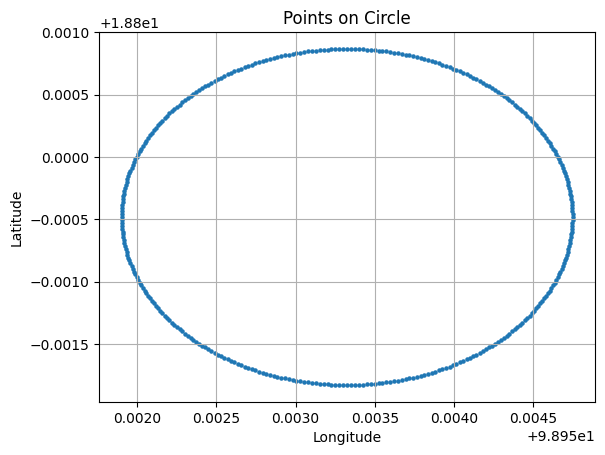

In [ ]:
import matplotlib.pyplot as plt

# Extract latitude and longitude points from circle_points
latitudes = [point[0] for point in circle_points]
longitudes = [point[1] for point in circle_points]

# Plot the points
plt.scatter(longitudes, latitudes, s=5)  # s parameter sets the size of the points
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Points on Circle')
plt.grid(True)
plt.show()

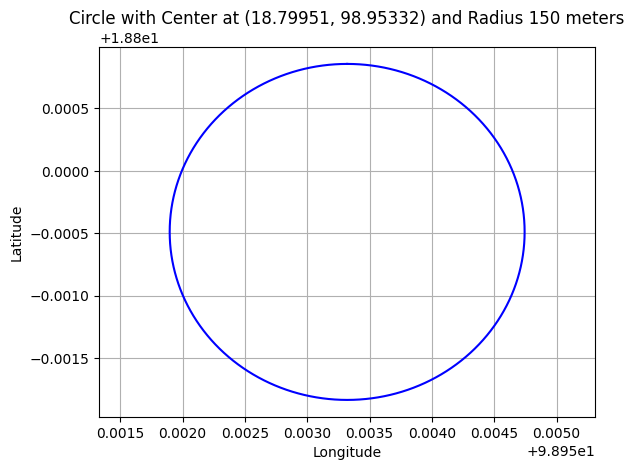

In [ ]:
from geopy.distance import geodesic
import math
import matplotlib.pyplot as plt

def create_circle(center_lat, center_lng, radius):
    # Earth's radius in meters
    earth_radius = 6378137.0

    # Convert radius from meters to radians
    radius_in_radians = radius / earth_radius

    # Convert latitude and longitude from degrees to radians
    center_lat_radians = math.radians(center_lat)
    center_lng_radians = math.radians(center_lng)

    # Initialize list to store circle points
    circle_points = []

    # Generate points along the circle
    for i in range(361):  # Increase the range by 1 to close the circle
        # Calculate the angle in radians for each point
        angle = math.radians(i)

        # Calculate the coordinates of the point
        point_lat = math.asin(math.sin(center_lat_radians) * math.cos(radius_in_radians) +
                              math.cos(center_lat_radians) * math.sin(radius_in_radians) * math.cos(angle))
        point_lng = center_lng_radians + math.atan2(math.sin(angle) * math.sin(radius_in_radians) * math.cos(center_lat_radians),
                                                     math.cos(radius_in_radians) - math.sin(center_lat_radians) * math.sin(point_lat))

        # Convert back from radians to degrees
        point_lat = math.degrees(point_lat)
        point_lng = math.degrees(point_lng)

        # Append the point to the list
        circle_points.append((point_lat, point_lng))

    return circle_points

# Center point coordinates
center_lat = 18.79951
center_lng = 98.95332

# Radius in meters
radius = 150

# Generate circle points
circle_points = create_circle(center_lat, center_lng, radius)

# Extract latitudes and longitudes from the circle points
lats = [point[0] for point in circle_points]
lngs = [point[1] for point in circle_points]

# Add points to the plot
additional_points = [
    # (df_resampled['lat'], df_resampled['lng'])
]
additional_lats = [point[0] for point in additional_points]
additional_lngs = [point[1] for point in additional_points]
plt.scatter(additional_lngs, additional_lats, color='red')

# Plotting the circle
plt.plot(lngs, lats, color='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Circle with Center at ({}, {}) and Radius {} meters'.format(center_lat, center_lng, radius))
plt.grid(True)
plt.axis('equal')  # Equal aspect ratio ensures the circle looks like a circle
plt.show()

In [ ]:
df_resampled['lng'].describe()

count    78852.000000
mean        98.957712
std          0.005363
min         98.888094
25%         98.953311
50%         98.959860
75%         98.960249
max         99.686910
Name: lng, dtype: float64

In [ ]:
df_resampled_temp = df_resampled
df_resampled_temp

,datetime,time,bus,lat,lng,speed
0,2022-01-04 08:00:00,1.641283e+18,2.0,18.796899,98.960308,0.1332
1,2022-01-04 08:00:10,1.641283e+18,2.0,18.796910,98.960301,0.0612
2,2022-01-04 08:00:20,1.641283e+18,2.0,18.796912,98.960304,0.1332
3,2022-01-04 08:00:30,1.641283e+18,2.0,18.796912,98.960309,0.1296
4,2022-01-04 08:00:40,1.641283e+18,2.0,18.796917,98.960309,0.0792
...,...,...,...,...,...,...
235650,2022-01-31 14:35:00,1.643640e+18,20.0,18.805159,98.950088,15.9300
235651,2022-01-31 14:35:10,1.643640e+18,17.0,18.802019,98.948559,21.2040
235652,2022-01-31 14:35:20,1.643640e+18,17.0,18.802581,98.948579,24.5052
235653,2022-01-31 14:35:30,1.643640e+18,20.0,18.803619,98.949373,32.8284


#### Plot circle ####

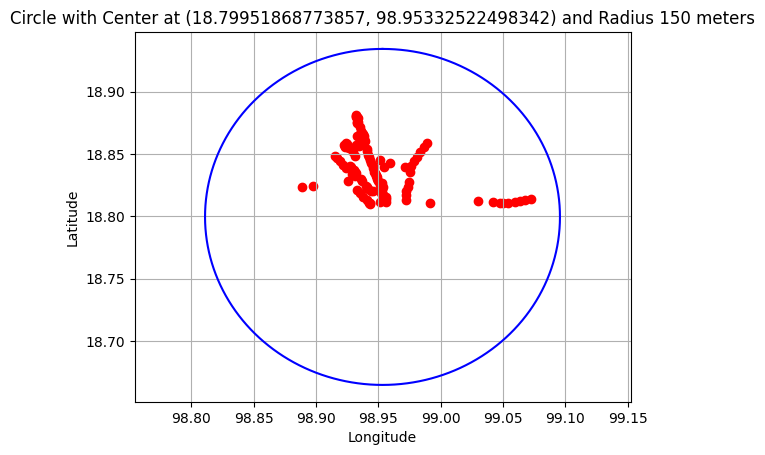

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt

# Function to create a circle
def create_circle(center_lat, center_lng, radius):
    # Earth's radius in meters
    earth_radius = 6378137.0

    # Convert radius from meters to radians
    radius_in_radians = radius / earth_radius

    # Convert latitude and longitude from degrees to radians
    center_lat_radians = math.radians(center_lat)
    center_lng_radians = math.radians(center_lng)

    # Initialize list to store circle points
    circle_points = []

    # Generate points along the circle
    for i in range(361):  # Increase the range by 1 to close the circle
        # Calculate the angle in radians for each point
        angle = math.radians(i)

        # Calculate the coordinates of the point
        point_lat = math.asin(math.sin(center_lat_radians) * math.cos(radius_in_radians) +
                              math.cos(center_lat_radians) * math.sin(radius_in_radians) * math.cos(angle))
        point_lng = center_lng_radians + math.atan2(math.sin(angle) * math.sin(radius_in_radians) * math.cos(center_lat_radians),
                                                     math.cos(radius_in_radians) - math.sin(center_lat_radians) * math.sin(point_lat))

        # Convert back from radians to degrees
        point_lat = math.degrees(point_lat)
        point_lng = math.degrees(point_lng)

        # Append the point to the list
        circle_points.append((point_lat, point_lng))

    return circle_points

lat_plot = df_resampled['lat']
lng_plot = df_resampled['lng']

filter_lat = (lat_plot < 18.81)
filter_lat = lat_plot[~filter_lat]

filter_lng = (lng_plot < 95.45)
filter_lng = lng_plot[~filter_lng]

# filter_lat = lat_plot
# filter_lng = lng_plot

# Sample DataFrame with 'lat' and 'lng' columns
# Assuming df_resampled is your DataFrame containing 'lat' and 'lng' columns
# Replace this with your actual DataFrame
data = {
    # 'lat': [18.800866160664754, 18.800865955436453, 18.80086533981408,
    #         18.800864313985162, 18.800862878262176, 18.800861033082477],
    # 'lng': [98.95332522498342, 98.95335006709459, 98.95337490163845,
    #         98.95339972104995, 98.95342451776867, 98.95344928424113]

    'lat': filter_lat,
    'lng': filter_lng,

}

df_resampled = pd.DataFrame(data)

# Center point coordinates
center_lat = 18.79951868773857
center_lng = 98.95332522498342

# Radius in meters
radius = 15000

# Generate circle points
circle_points = create_circle(center_lat, center_lng, radius)

# Extract latitudes and longitudes from the circle points
lats = [point[0] for point in circle_points]
lngs = [point[1] for point in circle_points]

# Plotting the circle
plt.plot(lngs, lats, color='blue')

north_lat = ['18.800870003819583']
north_lng = ['98.95337270637718']

# Plotting the red points from df_resampled
plt.scatter(df_resampled['lng'], df_resampled['lat'], color='red')
# plt.scatter(north_lat, north_lng, color='green')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Circle with Center at ({}, {}) and Radius {} meters'.format(center_lat, center_lng, 150))
plt.grid(True)
plt.axis('equal')  # Equal aspect ratio ensures the circle looks like a circle
plt.show()


In [ ]:
df_resampled = df_resampled_temp
df_resampled

,datetime,time,bus,lat,lng,speed
0,2022-01-04 08:00:00,1.641283e+18,2.0,18.796899,98.960308,0.1332
1,2022-01-04 08:00:10,1.641283e+18,2.0,18.796910,98.960301,0.0612
2,2022-01-04 08:00:20,1.641283e+18,2.0,18.796912,98.960304,0.1332
3,2022-01-04 08:00:30,1.641283e+18,2.0,18.796912,98.960309,0.1296
4,2022-01-04 08:00:40,1.641283e+18,2.0,18.796917,98.960309,0.0792
...,...,...,...,...,...,...
235650,2022-01-31 14:35:00,1.643640e+18,20.0,18.805159,98.950088,15.9300
235651,2022-01-31 14:35:10,1.643640e+18,17.0,18.802019,98.948559,21.2040
235652,2022-01-31 14:35:20,1.643640e+18,17.0,18.802581,98.948579,24.5052
235653,2022-01-31 14:35:30,1.643640e+18,20.0,18.803619,98.949373,32.8284


In [ ]:
# from geopy.distance import geodesic

# # Define the center point (latitude, longitude)
# center_lat = 18.79951868773857
# center_lng = 98.95332522498342

# # Define the end point (latitude, longitude)
# end_lat = 18.79952933268651
# end_lng = 98.95190068674742

# # Calculate the distance between the center and end point (assumed to be the radius)
# radius = geodesic((center_lat, center_lng), (end_lat, end_lng)).meters

# print("Radius of the circle:", radius, "meters")

In [ ]:
# from math import radians, sin, cos, sqrt, atan2
# import pandas as pd

# def haversine(lat1, lon1, lat2, lon2):
#     R = 6371.0  # Radius of the Earth in kilometers

#     # Convert latitude and longitude from degrees to radians
#     lat1 = radians(lat1)
#     lon1 = radians(lon1)
#     lat2 = radians(lat2)
#     lon2 = radians(lon2)

#     # Calculate differences
#     dlat = lat2 - lat1
#     dlon = lon2 - lon1

#     # Apply Haversine formula
#     a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
#     c = 2 * atan2(sqrt(a), sqrt(1 - a))
#     distance = R * c

#     return distance

In [ ]:
# # Import necessary libraries
# import pandas as pd

# # Load dataset containing bus locations (latitude, longitude) and timestamps
# # Example: df = pd.read_csv('bus_locations.csv')

# # Convert 'time' column to datetime format
# df['time'] = pd.to_datetime(df['time'])

# # Sort DataFrame by timestamp
# df = df.sort_values(by='time')

# # Iterate over each row in the dataset
# for index, row in df.iterrows():
#     # Calculate distance between bus location and center of the area

#     center_lat = 18.79951868773857
#     center_lon = 98.95332522498342

#     distance = haversine(center_lat, center_lon, row['lat'], row['lng'])

#     # Check if the bus is within the defined area
#     if distance <= radius:
#         # Calculate time difference since the previous location
#         if index > 0:
#             # Calculate time difference in hours (assuming the dataset is sorted by timestamp)
#             time_diff = (row['time'] - df.loc[index - 1, 'time']).total_seconds() / 3600  # in hours

#             # Calculate velocity
#             velocity = calculate_velocity(df.loc[index - 1, 'lat'], df.loc[index - 1, 'lng'],
#                                            row['lat'], row['lng'], time_diff)

#             # Print or store the velocity along with timestamp and any other relevant information
#             print(f" Velocity: {velocity} km/h, Timestamp: {row['time']}")


In [ ]:
# def calculate_velocity(lat1, lon1, lat2, lon2, time_diff):
#     # Calculate distance between two points using Haversine formula
#     distance = haversine(lat1, lon1, lat2, lon2)

#     # Calculate velocity (distance / time)
#     velocity = distance / time_diff

#     return velocity

# # Define the center point (latitude, longitude) of the area and the radius (in kilometers)
# center_lat = 18.79951868773857
# center_lon = 98.95332522498342
# radius = 0.15  # 0.15 kilometer

# # Load dataset containing bus locations (latitude, longitude) and timestamps
# # Example: df = pd.read_csv('bus_locations.csv')

# # Iterate over each row in the dataset
# for index, row in df.iterrows():
#     # Calculate distance between bus location and center of the area
#     distance = haversine(center_lat, center_lon, row['lat'], row['lng'])

#     # Check if the bus is within the defined area
#     if distance <= radius:
#         # Calculate time difference since the previous location (assuming the dataset is sorted by timestamp)
#         if index > 0:
#             time_diff = (row['time'] - df.loc[index - 1, 'time']).seconds / 3600  # in hours

#             # Calculate velocity
#             velocity = calculate_velocity(df.loc[index - 1, 'lat'], df.loc[index - 1, 'lng'],
#                                            row['lat'], row['lng'], time_diff)

#             # Print or store the velocity along with timestamp and any other relevant information
#             print(f"Bus ID: {row['bus_id']}, Velocity: {velocity} km/h, Timestamp: {row['time']}")


In [ ]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Radius of the Earth in kilometers

    # Convert latitude and longitude from degrees to radians
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    # Calculate differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Apply Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c

    return distance

# Example usage
lat1 = 18.79951868773857
lon1 = 98.95332522498342
lat2 = 18.79952933268651
lon2 = 98.95190068674742

distance = haversine(lat1, lon1, lat2, lon2)
print("Distance between the two points:", distance, "km")


Distance between the two points: 0.14995568717997482 km


In [ ]:
# calculate velocity in unit of km/h
velocity = distance / df['time_diff'] # currently velocity is in unit of m/s

In [ ]:
velocity = velocity.dropna()

In [ ]:
velocity

0                    inf
1           1.499557e-10
2           1.499557e-10
3           1.499557e-10
4           1.499557e-10
                ...     
19019650    3.487342e-12
19019651    1.666174e-11
19019652    1.499557e-10
19019653    6.095760e-13
19019654    2.142224e-11
Name: time_diff, Length: 19019655, dtype: float64

In [ ]:
velocity.replace([np.inf, -np.inf], np.nan, inplace=True)
velocity

0                    NaN
1           1.499557e-10
2           1.499557e-10
3           1.499557e-10
4           1.499557e-10
                ...     
19019650    3.487342e-12
19019651    1.666174e-11
19019652    1.499557e-10
19019653    6.095760e-13
19019654    2.142224e-11
Name: time_diff, Length: 19019655, dtype: float64

In [ ]:
velocity.describe()

count    1.596870e+07
mean     7.541750e-11
std      6.318909e-11
min      3.693963e-16
25%      1.363234e-11
50%      4.998523e-11
75%      1.499557e-10
max      1.499557e-10
Name: time_diff, dtype: float64

In [ ]:
df_resampled['velocity'] = velocity

df_resampled = df_resampled.dropna()
df_resampled

,datetime,time,bus,lat,lng,speed,velocity
1,2022-01-04 08:00:10,1.641283e+18,2.0,18.796910,98.960301,0.0612,1.499557e-10
2,2022-01-04 08:00:20,1.641283e+18,2.0,18.796912,98.960304,0.1332,1.499557e-10
3,2022-01-04 08:00:30,1.641283e+18,2.0,18.796912,98.960309,0.1296,1.499557e-10
4,2022-01-04 08:00:40,1.641283e+18,2.0,18.796917,98.960309,0.0792,1.499557e-10
5,2022-01-04 08:00:50,1.641283e+18,2.0,18.796906,98.960302,0.1008,1.499557e-10
...,...,...,...,...,...,...,...
235650,2022-01-31 14:35:00,1.643640e+18,20.0,18.805159,98.950088,15.9300,1.499557e-10
235651,2022-01-31 14:35:10,1.643640e+18,17.0,18.802019,98.948559,21.2040,1.499557e-10
235652,2022-01-31 14:35:20,1.643640e+18,17.0,18.802581,98.948579,24.5052,1.499557e-10
235653,2022-01-31 14:35:30,1.643640e+18,20.0,18.803619,98.949373,32.8284,1.499557e-10


In [ ]:
df_resampled

,datetime,time,bus,lat,lng,speed,velocity
1,2022-01-04 08:00:10,1.641283e+18,2.0,18.796910,98.960301,0.0612,1.499557e-10
2,2022-01-04 08:00:20,1.641283e+18,2.0,18.796912,98.960304,0.1332,1.499557e-10
3,2022-01-04 08:00:30,1.641283e+18,2.0,18.796912,98.960309,0.1296,1.499557e-10
4,2022-01-04 08:00:40,1.641283e+18,2.0,18.796917,98.960309,0.0792,1.499557e-10
5,2022-01-04 08:00:50,1.641283e+18,2.0,18.796906,98.960302,0.1008,1.499557e-10
...,...,...,...,...,...,...,...
235650,2022-01-31 14:35:00,1.643640e+18,20.0,18.805159,98.950088,15.9300,1.499557e-10
235651,2022-01-31 14:35:10,1.643640e+18,17.0,18.802019,98.948559,21.2040,1.499557e-10
235652,2022-01-31 14:35:20,1.643640e+18,17.0,18.802581,98.948579,24.5052,1.499557e-10
235653,2022-01-31 14:35:30,1.643640e+18,20.0,18.803619,98.949373,32.8284,1.499557e-10


In [ ]:
df_resampled_temp = df_resampled
df_resampled_temp

,datetime,time,bus,lat,lng,speed,velocity
1,2022-01-04 08:00:10,1.641283e+18,2.0,18.796910,98.960301,0.0612,1.499557e-10
2,2022-01-04 08:00:20,1.641283e+18,2.0,18.796912,98.960304,0.1332,1.499557e-10
3,2022-01-04 08:00:30,1.641283e+18,2.0,18.796912,98.960309,0.1296,1.499557e-10
4,2022-01-04 08:00:40,1.641283e+18,2.0,18.796917,98.960309,0.0792,1.499557e-10
5,2022-01-04 08:00:50,1.641283e+18,2.0,18.796906,98.960302,0.1008,1.499557e-10
...,...,...,...,...,...,...,...
235650,2022-01-31 14:35:00,1.643640e+18,20.0,18.805159,98.950088,15.9300,1.499557e-10
235651,2022-01-31 14:35:10,1.643640e+18,17.0,18.802019,98.948559,21.2040,1.499557e-10
235652,2022-01-31 14:35:20,1.643640e+18,17.0,18.802581,98.948579,24.5052,1.499557e-10
235653,2022-01-31 14:35:30,1.643640e+18,20.0,18.803619,98.949373,32.8284,1.499557e-10


In [ ]:
df_resampled['hour'] = df_resampled['datetime'].dt.hour
df_resampled['hour']

<ipython-input-42-bb18b01c68f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resampled['hour'] = df_resampled['datetime'].dt.hour


1          8
2          8
3          8
4          8
5          8
          ..
235650    14
235651    14
235652    14
235653    14
235654    14
Name: hour, Length: 75698, dtype: int64

In [ ]:
df_resampled

,datetime,time,bus,lat,lng,speed,velocity,hour
1,2022-01-04 08:00:10,1.641283e+18,2.0,18.796910,98.960301,0.0612,1.499557e-10,8
2,2022-01-04 08:00:20,1.641283e+18,2.0,18.796912,98.960304,0.1332,1.499557e-10,8
3,2022-01-04 08:00:30,1.641283e+18,2.0,18.796912,98.960309,0.1296,1.499557e-10,8
4,2022-01-04 08:00:40,1.641283e+18,2.0,18.796917,98.960309,0.0792,1.499557e-10,8
5,2022-01-04 08:00:50,1.641283e+18,2.0,18.796906,98.960302,0.1008,1.499557e-10,8
...,...,...,...,...,...,...,...,...
235650,2022-01-31 14:35:00,1.643640e+18,20.0,18.805159,98.950088,15.9300,1.499557e-10,14
235651,2022-01-31 14:35:10,1.643640e+18,17.0,18.802019,98.948559,21.2040,1.499557e-10,14
235652,2022-01-31 14:35:20,1.643640e+18,17.0,18.802581,98.948579,24.5052,1.499557e-10,14
235653,2022-01-31 14:35:30,1.643640e+18,20.0,18.803619,98.949373,32.8284,1.499557e-10,14


In [ ]:
hour_average_velocity = df_resampled.groupby('hour')['velocity'].mean()
hour_average_velocity

hour
8     9.413057e-11
9     9.532145e-11
10    9.484633e-11
11    8.903102e-11
12    9.212934e-11
13    9.946647e-11
14    1.047976e-10
15    9.726829e-11
16    8.692640e-11
17    7.832948e-11
18    6.980736e-11
19    1.042628e-10
20    1.090726e-10
21    1.042486e-10
22    1.106102e-10
Name: velocity, dtype: float64

In [ ]:
df_resampled['velocity'] = df_resampled['velocity'] * pow(10, 11)
df_resampled

<ipython-input-45-2e7a538cde91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resampled['velocity'] = df_resampled['velocity'] * pow(10, 11)


,datetime,time,bus,lat,lng,speed,velocity,hour
1,2022-01-04 08:00:10,1.641283e+18,2.0,18.796910,98.960301,0.0612,14.995569,8
2,2022-01-04 08:00:20,1.641283e+18,2.0,18.796912,98.960304,0.1332,14.995569,8
3,2022-01-04 08:00:30,1.641283e+18,2.0,18.796912,98.960309,0.1296,14.995569,8
4,2022-01-04 08:00:40,1.641283e+18,2.0,18.796917,98.960309,0.0792,14.995569,8
5,2022-01-04 08:00:50,1.641283e+18,2.0,18.796906,98.960302,0.1008,14.995569,8
...,...,...,...,...,...,...,...,...
235650,2022-01-31 14:35:00,1.643640e+18,20.0,18.805159,98.950088,15.9300,14.995569,14
235651,2022-01-31 14:35:10,1.643640e+18,17.0,18.802019,98.948559,21.2040,14.995569,14
235652,2022-01-31 14:35:20,1.643640e+18,17.0,18.802581,98.948579,24.5052,14.995569,14
235653,2022-01-31 14:35:30,1.643640e+18,20.0,18.803619,98.949373,32.8284,14.995569,14


In [ ]:
df_resampled.describe()

,time,bus,lat,lng,speed,velocity,hour
count,7.569800e+04,75698.000000,75698.000000,75698.000000,75698.000000,75698.000000,75698.000000
mean,1.642444e+18,11.687865,18.798182,98.957676,4.323526,9.510986,12.311118
std,7.122685e+14,11.415913,0.006216,0.005372,11.433482,6.352964,3.798215
min,1.641283e+18,1.000000,17.798008,98.888094,0.000000,0.000127,8.000000
25%,1.641830e+18,2.000000,18.796907,98.953066,0.075600,2.142224,9.000000
50%,1.642495e+18,6.000000,18.797174,98.959863,0.190800,14.995569,11.000000
75%,1.643016e+18,19.000000,18.799033,98.960247,1.454400,14.995569,14.000000
max,1.643640e+18,73.000000,18.881209,99.686910,608.245200,14.995569,22.000000


In [ ]:
df_resampled['day'] = df_resampled['datetime'].dt.date
df_resampled['day']

<ipython-input-47-075c6342b2f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resampled['day'] = df_resampled['datetime'].dt.date


1         2022-01-04
2         2022-01-04
3         2022-01-04
4         2022-01-04
5         2022-01-04
             ...    
235650    2022-01-31
235651    2022-01-31
235652    2022-01-31
235653    2022-01-31
235654    2022-01-31
Name: day, Length: 75698, dtype: object

In [ ]:
df_resampled['new_datetime'] = (df_resampled['day'].astype(str) + ' ' + df_resampled['hour'].astype(str) + ':00:00')
pd.to_datetime(df_resampled['new_datetime'])
df_resampled['new_datetime']

<ipython-input-48-24c5c85ba9a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resampled['new_datetime'] = (df_resampled['day'].astype(str) + ' ' + df_resampled['hour'].astype(str) + ':00:00')


1          2022-01-04 8:00:00
2          2022-01-04 8:00:00
3          2022-01-04 8:00:00
4          2022-01-04 8:00:00
5          2022-01-04 8:00:00
                 ...         
235650    2022-01-31 14:00:00
235651    2022-01-31 14:00:00
235652    2022-01-31 14:00:00
235653    2022-01-31 14:00:00
235654    2022-01-31 14:00:00
Name: new_datetime, Length: 75698, dtype: object

In [ ]:
df_out = df_resampled

drop = ['datetime', 'bus', 'lat', 'lng', 'speed', 'hour', 'day']
df_out = df_out.drop(columns=drop)
df_out

,time,velocity,new_datetime
1,1.641283e+18,14.995569,2022-01-04 8:00:00
2,1.641283e+18,14.995569,2022-01-04 8:00:00
3,1.641283e+18,14.995569,2022-01-04 8:00:00
4,1.641283e+18,14.995569,2022-01-04 8:00:00
5,1.641283e+18,14.995569,2022-01-04 8:00:00
...,...,...,...
235650,1.643640e+18,14.995569,2022-01-31 14:00:00
235651,1.643640e+18,14.995569,2022-01-31 14:00:00
235652,1.643640e+18,14.995569,2022-01-31 14:00:00
235653,1.643640e+18,14.995569,2022-01-31 14:00:00


In [ ]:
df_out.isnull().sum()

time            0
velocity        0
new_datetime    0
dtype: int64

In [ ]:
df_average_velocity = df_out.groupby('new_datetime')['velocity'].mean().reset_index()
df_average_velocity


,new_datetime,velocity
0,2022-01-04 10:00:00,9.962421
1,2022-01-04 11:00:00,4.160791
2,2022-01-04 12:00:00,3.579156
3,2022-01-04 13:00:00,11.808692
4,2022-01-04 14:00:00,8.753684
...,...,...
233,2022-01-31 12:00:00,3.580426
234,2022-01-31 13:00:00,9.315459
235,2022-01-31 14:00:00,14.623318
236,2022-01-31 8:00:00,3.654807


In [ ]:
df_average_velocity.rename(columns={ 'new_datetime':'datetime', 'velocity':'speed'}, inplace = True)
df_average_velocity

,datetime,speed
0,2022-01-04 10:00:00,9.962421
1,2022-01-04 11:00:00,4.160791
2,2022-01-04 12:00:00,3.579156
3,2022-01-04 13:00:00,11.808692
4,2022-01-04 14:00:00,8.753684
...,...,...
233,2022-01-31 12:00:00,3.580426
234,2022-01-31 13:00:00,9.315459
235,2022-01-31 14:00:00,14.623318
236,2022-01-31 8:00:00,3.654807


from matplotlib import pyplot as plt
df_average_velocity['speed'].plot(kind='hist', bins=20, title='speed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['speed']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_average_velocity.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('speed')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['datetime']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'datetime'}, axis=1)
              .sort_values('datetime', ascending=True))
  xs = counted['datetime']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_average_velocity.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['speed']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_average_velocity.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('speed')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['datetime']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'datetime'}, axis=1)
              .sort_values('datetime', ascending=True))
  xs = counted['datetime']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_average_velocity.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df_average_velocity['speed'].plot(kind='line', figsize=(8, 4), title='speed')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df_average_velocity['datetime'] = pd.to_datetime(df_average_velocity['datetime'])

In [ ]:
# Convert DataFrame to dictionary
data_to_firestore = df_average_velocity.to_dict(orient='records')
data_to_firestore

[{'datetime': Timestamp('2022-01-04 10:00:00'), 'speed': 9.96242067625066},
 {'datetime': Timestamp('2022-01-04 11:00:00'), 'speed': 4.160790768150031},
 {'datetime': Timestamp('2022-01-04 12:00:00'), 'speed': 3.579156410504969},
 {'datetime': Timestamp('2022-01-04 13:00:00'), 'speed': 11.80869231599255},
 {'datetime': Timestamp('2022-01-04 14:00:00'), 'speed': 8.753683893551827},
 {'datetime': Timestamp('2022-01-04 15:00:00'), 'speed': 10.878697507937064},
 {'datetime': Timestamp('2022-01-04 16:00:00'), 'speed': 14.641507605917079},
 {'datetime': Timestamp('2022-01-04 17:00:00'), 'speed': 10.400601684208775},
 {'datetime': Timestamp('2022-01-04 18:00:00'), 'speed': 3.34677557019524},
 {'datetime': Timestamp('2022-01-04 19:00:00'), 'speed': 12.452557911158463},
 {'datetime': Timestamp('2022-01-04 20:00:00'), 'speed': 14.953915271482824},
 {'datetime': Timestamp('2022-01-04 21:00:00'), 'speed': 14.887351538584774},
 {'datetime': Timestamp('2022-01-04 22:00:00'), 'speed': 14.249646900635

In [ ]:
db = firestore.client()

In [ ]:
# Send data to Firestore
for doc_data in data_to_firestore:
    db.collection('slot').add(doc_data)